In [1]:
import platform
print(platform.python_version())

3.9.6


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('./user-ct-test-collection-02.txt', sep='\t')

Convert columns to titles that are quicker to type.

In [4]:
data = data.rename(columns={
    'AnonID': 'ID',
    'QueryTime': 'Time',
    'ItemRank': 'Rank',
    'ClickURL': 'URL',
})

In [5]:
data['Time'] = pd.to_datetime(data['Time'])

In [6]:
data

,ID,Query,Time,Rank,URL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com
...,...,...,...,...,...
3614501,24969423,my space. com,2006-05-31 19:03:32,2.0,http://music.myspace.com
3614502,24969423,my space.com,2006-05-31 19:12:00,NaN,NaN
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,NaN,NaN
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,NaN,NaN


According to the README there should be no missing data except for `Rank` and `URL`. Confirm this.

In [7]:
data[pd.isnull(data.Query)]

,ID,Query,Time,Rank,URL
15907,36492,NaN,2006-05-04 05:10:08,NaN,NaN
15963,36492,NaN,2006-05-13 11:26:14,NaN,NaN
15970,36492,NaN,2006-05-15 04:46:45,NaN,NaN
15975,36492,NaN,2006-05-21 17:30:04,NaN,NaN
15997,36492,NaN,2006-05-28 02:48:52,NaN,NaN
...,...,...,...,...,...
3411223,18828297,NaN,2006-03-25 15:15:26,NaN,NaN
3439610,19546440,NaN,2006-04-20 07:13:16,NaN,NaN
3442378,19655667,NaN,2006-05-20 22:04:18,NaN,NaN
3514303,21915648,NaN,2006-05-31 01:39:49,NaN,NaN


In [8]:
data[pd.isnull(data.ID)]

,ID,Query,Time,Rank,URL


In [9]:
data[pd.isnull(data.Time)]

,ID,Query,Time,Rank,URL


The NaN's are probably blank searches that were interpreted as missing data by pandas, so replace these with blank strings instead.

In [10]:
data['Query'] = data['Query'].fillna('')
data[pd.isnull(data.Query)]

,ID,Query,Time,Rank,URL


What is the range of Rank?

In [11]:
print(data['Rank'].min())
print(data['Rank'].max())

0.0
500.0


I assume that the ranking is 0-indexed.

It would be interesting to understand which sites are being visited, so obtain the domain for each site:

In [12]:
import tldextract

def extract_domain(url):
    try:
        domain = tldextract.extract(url).domain
    except TypeError:
        return np.nan
    
    if domain == '':
        return np.nan
    else:
        return domain

data['Domain'] = data['URL'].map(lambda x: extract_domain(x))
data

,ID,Query,Time,Rank,URL,Domain
0,479,family guy,2006-03-01 16:01:20,NaN,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com,familyguyfiles
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com,movieweb
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com,imdb
...,...,...,...,...,...,...
3614501,24969423,my space. com,2006-05-31 19:03:32,2.0,http://music.myspace.com,myspace
3614502,24969423,my space.com,2006-05-31 19:12:00,NaN,NaN,NaN
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,NaN,NaN,NaN
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,NaN,NaN,NaN


In [13]:
_ = data[pd.notnull(data['URL']) & pd.isnull(data['Domain'])]
_

,ID,Query,Time,Rank,URL,Domain
987243,2465001,arizona tree laws,2006-03-15 22:45:32,6.0,http://lib.az.us,NaN
1128553,2822850,spring boat parade discovery bay,2006-04-17 09:38:52,10.0,http://,NaN
1744382,4806669,yamaha waverunner fx cruiser sale,2006-03-19 14:09:26,6.0,http:///5,NaN
1839837,5165878,www.adultvideos.com,2006-04-04 08:08:18,6.0,http://www..com,NaN
2208652,6950858,http www.sexy latinas.com,2006-03-17 21:52:20,1.0,http://,NaN
2793374,10954301,decorative napkins and plates,2006-05-26 22:41:20,31.0,http://ww....com,NaN


There are 6 cases with domains that don't make sense. Drop them from the analysis for now...

In [14]:
data = data.drop(_.index)
data

,ID,Query,Time,Rank,URL,Domain
0,479,family guy,2006-03-01 16:01:20,NaN,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com,familyguyfiles
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com,movieweb
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com,imdb
...,...,...,...,...,...,...
3614501,24969423,my space. com,2006-05-31 19:03:32,2.0,http://music.myspace.com,myspace
3614502,24969423,my space.com,2006-05-31 19:12:00,NaN,NaN,NaN
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,NaN,NaN,NaN
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,NaN,NaN,NaN


(we now have 6-fewer lines)

**a) Extract relevant metrics, create visualizations, and share a few (2 to 3) insights that you find interesting.**

In [15]:
date_start = data.Time.min()
date_end = data.Time.max()
date_duration = date_end - date_start
print(date_start)
print(date_end)
print(date_duration)

2006-03-01 00:01:16
2006-05-31 23:59:56
91 days 23:58:40


1. The time-series covers from the beginning of March to the end of May 2006. Given the large time that has passed since the data was collected, we should be cautious about using this to draw inferences about events in 2022.

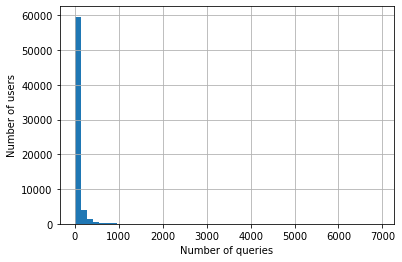

In [16]:
ax = data.groupby('ID').count()['Query'].hist(bins=50)
ax.set_xlabel('Number of queries')
ax.set_ylabel('Number of users');

This is clearly long-tailed - most users only make a few queries and a few users make a large number of queries.

Text(0, 0.5, 'Number of users')

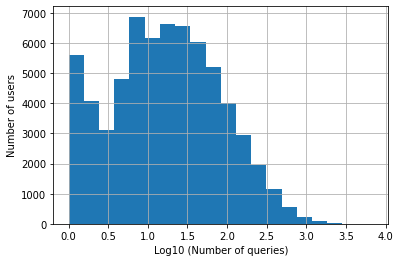

In [17]:
ax = np.log10(data.groupby('ID').count()['Query']).hist(bins=20)
ax.set_xlabel('Log10 (Number of queries)')
ax.set_ylabel('Number of users')


2. Most users make very few queries while some make more than 1000. It's interesting that there is a dip around 3 queries.

In [18]:
top_queries = list(data.groupby('Domain').count()['ID'].sort_values(ascending=False).head(10).index)
top_queries

['yahoo',
 'google',
 'myspace',
 'about',
 'ebay',
 'state',
 'wikipedia',
 'amazon',
 'msn',
 'imdb']

In [19]:
data['Hour'] = data.Time.map(lambda x: x.hour)

In [20]:
_ = pd.crosstab(data.Hour, data[data['Domain'].map(lambda x: x in top_queries)]['Domain'])
_ = _/_.sum()
_

Domain,about,amazon,ebay,google,imdb,msn,myspace,state,wikipedia,yahoo
Hour,,,,,,,,,,
0,0.037672,0.041496,0.039820,0.037987,0.049300,0.042259,0.049882,0.030443,0.048347,0.038477
1,0.026916,0.027199,0.025063,0.022602,0.038895,0.027667,0.038549,0.020360,0.034090,0.024592
2,0.014737,0.017348,0.018477,0.016463,0.026060,0.021035,0.027080,0.011904,0.023258,0.015367
3,0.009951,0.010461,0.011586,0.008044,0.020517,0.011370,0.017113,0.006505,0.012744,0.010849
4,0.005971,0.006887,0.011403,0.004761,0.012155,0.007296,0.010923,0.006635,0.009797,0.007437
5,0.004597,0.006974,0.006464,0.004611,0.007196,0.012128,0.006963,0.006440,0.006372,0.008519
6,0.007392,0.010287,0.014086,0.007342,0.009432,0.013455,0.007009,0.008521,0.009638,0.010566
7,0.016822,0.016215,0.020184,0.015586,0.012447,0.020277,0.007874,0.019189,0.012983,0.018756
8,0.027674,0.025368,0.030185,0.022652,0.027324,0.028709,0.014291,0.029662,0.020550,0.029958


<AxesSubplot:xlabel='Domain', ylabel='Hour'>

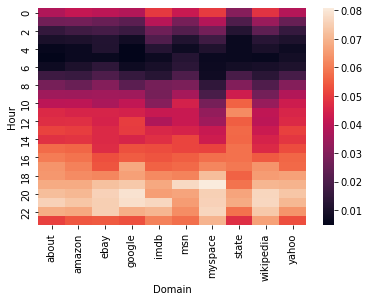

In [21]:
sns.heatmap(_)

3. The top 10 queries are shown above and their counts per hour are shown, normalised against the total number of counts to that domain. One interesting point is that `myspace` queries appear to be concentrated later in the morning than `msn` queries are. We may be able to use this information to help prioritise the result ordering based on time of day. Further analysis is required for a definite conclusion, however.

**c) What are some common queries?**

In [22]:
data.groupby('Query').count()['ID'].sort_values(ascending=False).head(20)

Query
-                  98554
google             32396
yahoo              13344
ebay               12949
yahoo.com           8733
mapquest            8680
google.com          8139
myspace             7653
myspace.com         7099
www.google.com      4255
www.yahoo.com       4196
internet            3854
http                3117
weather             2884
ebay.com            2772
map quest           2695
my space            2545
pogo                2474
american idol       2429
www.myspace.com     2416
Name: ID, dtype: int64

Common queries are searches for portal sites like `google`, `ebay`, and mapping service `mapquest`.

Note that I have not had time to parse the text so small variations (typos, spaces, etc) may change the exact ordering. Nevertheless, this gives an initial insight into the data.

In [23]:
data[data['Query'] == '-']

,ID,Query,Time,Rank,URL,Domain,Hour
214,507,-,2006-05-25 19:28:01,NaN,NaN,NaN,19
216,507,-,2006-05-25 19:30:43,NaN,NaN,NaN,19
218,507,-,2006-05-25 19:34:00,NaN,NaN,NaN,19
219,507,-,2006-05-25 19:34:28,NaN,NaN,NaN,19
225,507,-,2006-05-25 23:21:07,2.0,http://www.pogo.com,pogo,23
...,...,...,...,...,...,...,...
3614488,24967491,-,2006-05-31 21:14:17,1.0,http://www.cnn.com,cnn,21
3614492,24967672,-,2006-05-31 16:19:57,1.0,http://www.google.com,google,16
3614493,24968270,-,2006-05-31 16:56:21,NaN,NaN,NaN,16
3614494,24968272,-,2006-05-31 11:18:34,NaN,NaN,NaN,11


The most-searched-for term appears to be `-`. I'm not sure what this is; maybe it signifies missing data, especially given that searches for this resulted in clicks in some cases. I'm leaving this for now but with more time it might be better to exclude this from the initial analysis or investigate further.

**d) Which queries do not typically lead to a click?**

**e) Which queries almost always lead to a click?**

**f) Which queries do not seem to have relevant results? You should define this in
your own terms and back it up with data.**

In [24]:
query_count = data[pd.isnull(data['URL'])].groupby('Query').count()['ID']
query_count.sort_values(ascending=False).head(20)

Query
-                       67170
google                   6595
ebay                     6410
internet                 3791
yahoo.com                3516
mapquest                 3110
http                     3101
google.com               2619
yahoo                    2168
myspace.com              2137
ebay.com                 1853
mycl.cravelyrics.com     1838
weather                  1790
pogo                     1767
www.yahoo.com            1666
www.google.com           1640
american idol            1484
.com                     1361
tattoo                   1355
myspace                  1351
Name: ID, dtype: int64

The top queries like `google` also have many clicks that were not followed through, simply from the volume of of those queries. Therefore the ratio of clicks to non-clicks is important. To exclude obscure queries that were only searched for once and never resulted in a click from being counted, we limit the search to those queries that are relatively common. Like much of the world, we benchmark against google, requiring at least 10% as many queries as the search giant.

In [25]:
query_count_google = query_count.loc['google']
multiple_queries = query_count[query_count > query_count_google * 0.1].index

In [26]:
data['DidClick'] = [True for i in range(len(data))]
data.loc[pd.isnull(data['URL']), 'DidClick'] = False

In [27]:
_ = data[data['Query'].map(lambda x: x in multiple_queries)]
clicks_vs_query = pd.crosstab(_['Query'],_['DidClick'])
clicks_vs_query['ratio'] = clicks_vs_query[True] / (clicks_vs_query[True] + clicks_vs_query[False])

In [28]:
clicks_vs_query[False].min()

662

In [29]:
clicks_vs_query.sort_values('ratio', ascending=False).head(20)

DidClick,False,True,ratio
Query,,,
yahoo,2168,11176,0.837530
myspace,1351,6302,0.823468
google,6595,25801,0.796425
myspace.com,2137,4962,0.698972
google.com,2619,5520,0.678216
mapquest,3110,5570,0.641705
www.myspace.com,891,1525,0.631209
hotmail.com,712,1212,0.629938
www.google.com,1640,2615,0.614571


In [30]:
clicks_vs_query.sort_values('ratio', ascending=False).tail(20)

DidClick,False,True,ratio
Query,,,
ebay.com,1853,919,0.331530
pogo.com,778,376,0.325823
-,67170,31384,0.318445
sex,729,300,0.291545
www.letstalkhonestly.com,884,363,0.291099
pogo,1767,707,0.285772
travelocity,726,208,0.222698
porn,1019,216,0.174899
www.google,989,178,0.152528


So searches for `yahoo`, and other common top sites often result in clicks. At the other end of the scale, it can be seen that apart from nonsense queries, searches for `ebay.com`, `travelocity` and `www.google` result in few clicks. It is concerning that a customer cannot find what they are looking for in these cases because it is clear to us what they are looking for, so these are cases of a customer not finding relevant results.

**g) How long is the typical time spent by users on the search engine ? What does
this distribution look like ?**

In [31]:
userids = np.unique(data['ID'])
len(userids)

66000

There are 66,000 user ID's.

Check if the data is contiguous by ID. In the end I don't use this but it's interesting information about the dataset.

In [32]:
_ = (data['ID'].iloc[1:].reset_index(drop=True) - data['ID'].iloc[:-1].reset_index(drop=True))
(_ > 0).sum()

65999

Line-by-line, ID only changes the same number of times as the number of unique ID's, so the data is confirmed to be contiguous by ID.

The data set is too large but it's reasonable to use a sample of the first 1000 users. If there was more time we could check some basic properties by taking multiple random sets and performing basic statistical checks (T-Test, etc) to ensure that this set is representative of the population.

In [33]:
deltas = []
for id in userids[:1000]:
    data_user = data[data['ID'] == id]
    dt = data_user['Time'].iloc[1:].reset_index(drop=True) - data_user['Time'].iloc[:-1].reset_index(drop=True)
    deltas += list(dt)

In [34]:
len(deltas)

158633

In [35]:
seconds = [i.value/1e9 for i in deltas]

Text(0, 0.5, 'Number of records')

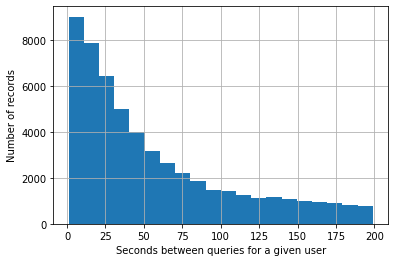

In [36]:
_ = pd.Series(seconds)
ax = _[(_ < 200) & (_ > 0)].hist(bins=20)
ax.set_xlabel('Seconds between queries for a given user')
ax.set_ylabel('Number of records')

Text(0, 0.5, 'Number of records')

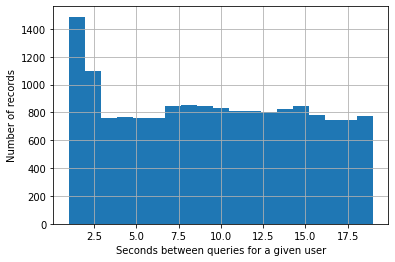

In [37]:
_ = pd.Series(seconds)
ax = _[(_ < 20) & (_ > 0)].hist(bins=19)
ax.set_xlabel('Seconds between queries for a given user')
ax.set_ylabel('Number of records')

Defining "how long" each session is difficult because it's difficult to distinguish between the end and beginning of a new session.

Following basic statistical theorry, the gap between sessions [should follow an exponential decay](https://en.wikipedia.org/wiki/Exponential_distribution) so with more time I would like to compare deviations from this exponential decay and the actual data to find where there is a dip in the time-delta *relative to the exponential decay*. There is a dip in the time-delta at around 3-5 seconds but this still feels to me like it should be part of the same session.

**h) What are the top urls that show up in results?**

In [38]:
data.groupby('URL').count()['ID'].sort_values(ascending=False).head(10)

URL
http://www.google.com           36103
http://www.yahoo.com            16271
http://www.myspace.com          15977
http://en.wikipedia.org         12275
http://www.amazon.com           11030
http://www.imdb.com              9791
http://www.mapquest.com          9402
http://www.ebay.com              7613
http://mail.yahoo.com            4814
http://www.bankofamerica.com     4495
Name: ID, dtype: int64

In [39]:
data.to_pickle('data.pkl')